In [1]:
import matplotlib.pyplot as plt
import numpy as np
from b39camera import *
from b39gain import *
%matplotlib widget

In [2]:
data = np.load('b39data.npz')

In [3]:
amps = [key for key in data.keys()]

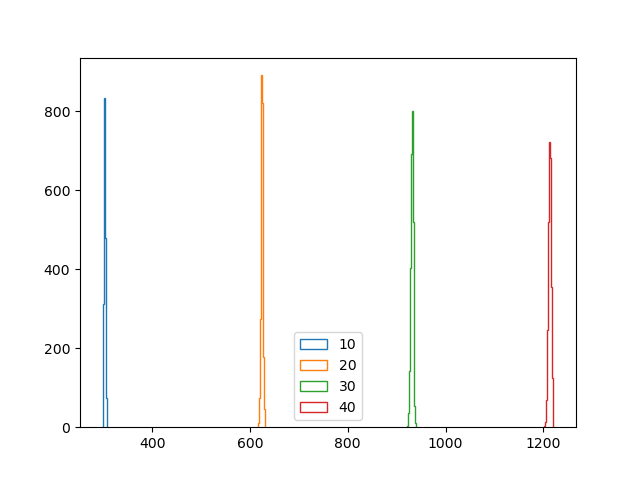

In [4]:
plt.figure()
for amp in amps:
    plt.hist(data[amp].sum(axis=2).mean(axis=1),label=amp, histtype='step')
plt.legend()
        

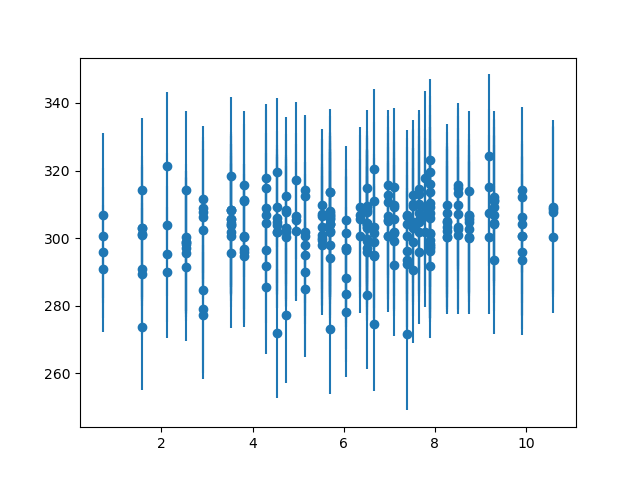

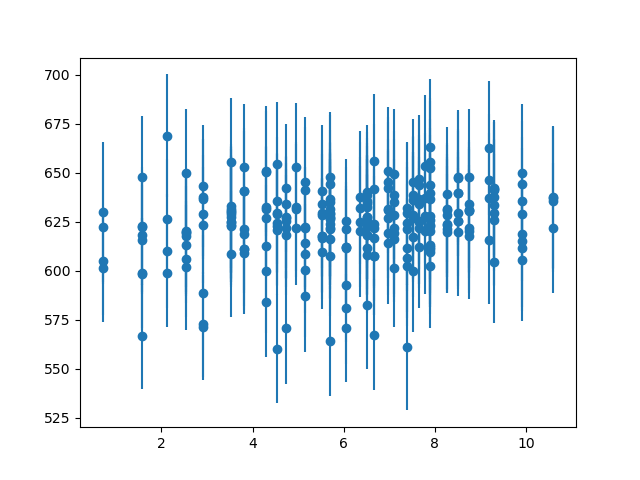

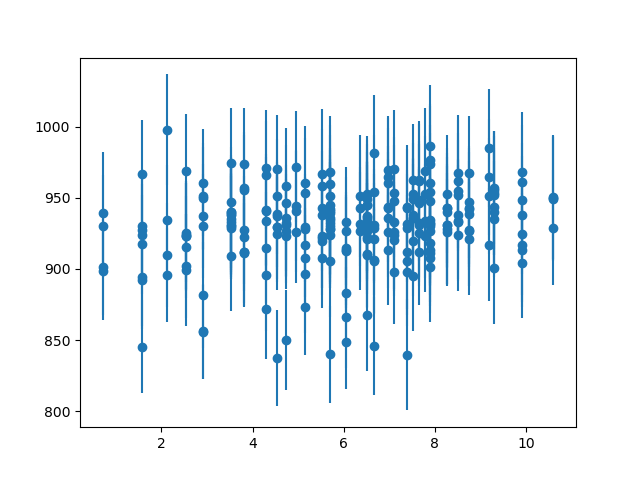

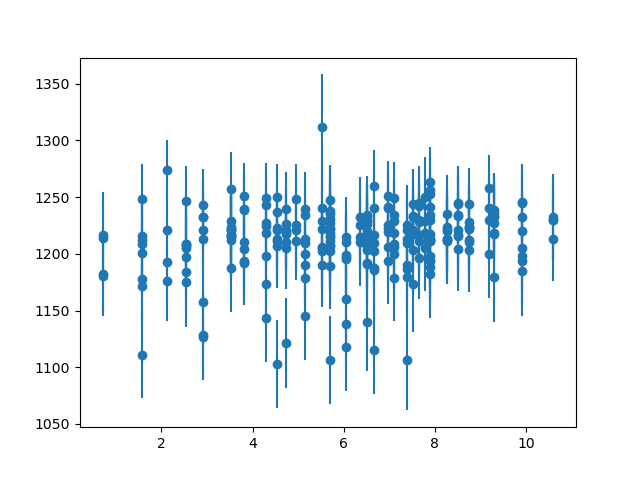

In [5]:
for amp in amps:
    plt.figure()
    pa_array = data[amp].sum(axis=2)
    ti = np.arange(pa_array.shape[1])
    approx_dist_from_center = id_to_pos(ti)
    plt.errorbar(approx_dist_from_center, pa_array.mean(axis=0),yerr=pa_array.std(axis=0),marker='o',linestyle='') 

In [6]:
tube_area = .001197
dist = 1.237
tube_omega = tube_area/dist**2
qe = .27
col_eff = .9
uv_filter = .89

In [7]:
for amp in amps:
    npe_array = data[amp]
    photons_at_tubes = npe_array / (qe * col_eff)
    total_photons = photons_at_tubes / uv_filter
    photons_per_omega_per_ns = total_photons / tube_omega / 100.
    meanwfs = photons_per_omega_per_ns.mean(axis=0)
    print(meanwfs.mean(axis=0).max())

3625.777169418993
7371.932223605822
10938.2824111218
14059.85972612137


In [8]:
photons = []
errs = []
for amp in amps:
    npe_array = data[amp]
    photons_per_omega_per_ns = photons_per_ster_ns(npe_array)
    meanwfs = photons_per_omega_per_ns.mean(axis=0)
    meanphotons = meanwfs.mean(axis=0).max()
    photons.append(meanphotons)
    err = photons_err(npe_array.mean(axis=0).mean(axis=0).max())
    errs.append(err)
    # print(meanwfs.mean(axis=0).max())
ampfit = np.array(amps).astype('int')

59.10836801317267
5.8622104598528635
-13428.804331181465
-4073.9069319314563
-3.029053608537173
59.10836801317267
11.919049674382903
-27303.452680021575
-8283.069914163849
-6.1586735368469725
59.10836801317267
17.685177705936606
-40512.157078228855
-12290.20495631662
-9.138080543961397
59.10836801317267
22.732190341344097
-52073.55454119008
-15797.595197889128
-11.745914558163177


In [9]:
from b39camera import row

In [10]:
row([255])

array([15])

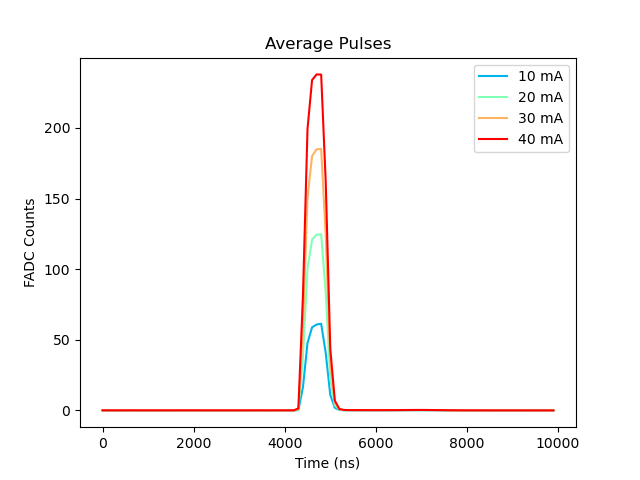

In [11]:
plt.figure()
colors = plt.cm.rainbow(np.array([10,20,30,40])/40)
for i,amp in enumerate(amps):
    avg_npe = data[amp].mean(axis=0).mean(axis=0)
    plt.plot(np.arange(0,100*100,100),avg_npe,color=colors[i], label = f'{amp} mA')
plt.title('Average Pulses')
plt.ylabel('FADC Counts')
plt.xlabel('Time (ns)')
plt.legend()

In [12]:
from scipy.optimize import curve_fit
def e_output(amp: float | np.ndarray, a: float, b: float) -> float | np.ndarray:
    return a * (1 - np.exp(-amp/b))

popt1, pcov1 = curve_fit(e_output, ampfit, photons, p0=(400,200), sigma = errs)

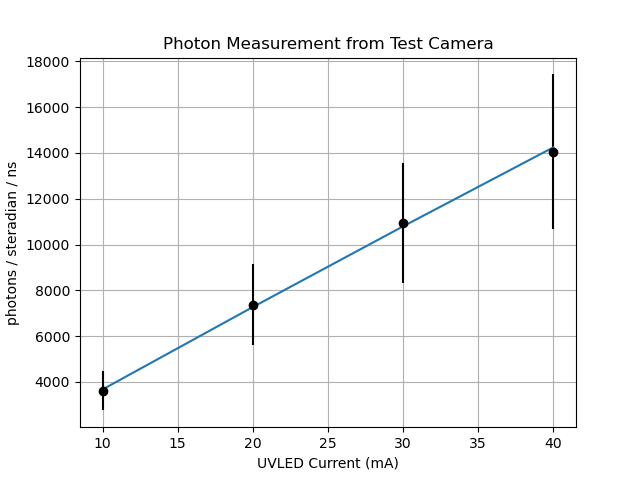

In [13]:
plt.figure()
plt.errorbar(np.array(amps).astype('int'), photons,yerr=errs, color='k',linestyle='',marker='o')
plt.plot(ampfit, e_output(ampfit,*popt1))
plt.xlabel('UVLED Current (mA)')
plt.ylabel('photons / steradian / ns')
plt.title('Photon Measurement from Test Camera')
plt.grid()

In [14]:
errs

[868.1037142627098, 1765.0226895170867, 2618.8934039841906, 3366.2749796477406]